In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

pd.set_option("display.max_columns", 400)
pd.set_option("display.max_rows", 400)

In [2]:
# reading the data from the csv file
telecom_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# viewing the first 5 records
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# getting the information for the dataype and non-null values in each column
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
# viewing the details for the numerical data
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
# getting the number of rows and columns in data
telecom_data.shape

(99999, 226)

In [7]:
# finding the unique values in each column
unique_values = telecom_data.nunique()
unique_values

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

there are some columns which have single unique values. <br>
these columns will not help in providing any information so we will get rid of all these columns

In [8]:
# removing the columns which contains only 1 unique values
non_unique_cols = unique_values[ unique_values < 2].reset_index()['index'].to_list()
non_unique_cols
telecom_data = telecom_data.drop(non_unique_cols, axis=1)

In [9]:
print('Shape of dataframe after removing the non-unique columns' + str(telecom_data.shape))

Shape of dataframe after removing the non-unique columns(99999, 210)


<b>1. Derive new features</b>

In [10]:
# replacing the NaN for the some of the recharge amount columns to 0 
recharge_cols_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
telecom_data[recharge_cols_zero] = telecom_data[recharge_cols_zero].apply(lambda x : x.fillna(0))

In [11]:
# replacing the NaN for the some of the columns nightpack and fbuser having more then 70% missing value 

cols_zero = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6',
             'arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'
            ]
telecom_data[cols_zero] = telecom_data[cols_zero].apply(lambda x : x.fillna(0))

In [12]:
## droping un-usefull columns mobilenumber and circleid is not usefull
telecom_data = telecom_data.drop(['mobile_number'], axis = 1)

In [13]:
## droping columns of date : last date of recharge is not required in both call and data pack
#date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9 
telecom_data = telecom_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1)

In [14]:
#categorial variable from dataset
categorial_variable = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [15]:
# replace missing values with '-1' in categorical columns
telecom_data[categorial_variable] = telecom_data[categorial_variable].apply(lambda x : x.fillna(-1))

In [16]:
# missing value
print(telecom_data[categorial_variable].isnull().sum()*100/len(categorial_variable))

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [17]:
# skewness along the index axis 
telecom_data.skew(axis = 0, skipna = True) 

arpu_6                 11.474894
arpu_7                 16.605237
arpu_8                 15.675775
arpu_9                 19.530101
onnet_mou_6             6.121922
onnet_mou_7             6.441534
onnet_mou_8             6.785896
onnet_mou_9             7.027112
offnet_mou_6            5.076506
offnet_mou_7            5.404053
offnet_mou_8            6.490353
offnet_mou_9            5.385932
roam_ic_mou_6          77.706808
roam_ic_mou_7         105.433161
roam_ic_mou_8          85.636130
roam_ic_mou_9          50.792708
roam_og_mou_6          13.740512
roam_og_mou_7          14.165811
roam_og_mou_8          21.198171
roam_og_mou_9          19.674610
loc_og_t2t_mou_6       13.806418
loc_og_t2t_mou_7       15.426488
loc_og_t2t_mou_8       18.512683
loc_og_t2t_mou_9       19.140012
loc_og_t2m_mou_6        6.062866
loc_og_t2m_mou_7        5.769011
loc_og_t2m_mou_8        5.560409
loc_og_t2m_mou_9        5.967327
loc_og_t2f_mou_6       22.664301
loc_og_t2f_mou_7       20.686701
loc_og_t2f

<b>We can create new feature as total_rech_amt_data month wise using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.</b>

In [18]:
# adding new column total data recharge amount data month wise 
telecom_data['total_rech_amt_data_6'] = telecom_data.apply(lambda row: row['total_rech_data_6'] * row['av_rech_amt_data_6'], axis=1)
telecom_data['total_rech_amt_data_7'] = telecom_data.apply(lambda row: row['total_rech_data_7'] * row['av_rech_amt_data_7'], axis=1)
telecom_data['total_rech_amt_data_8'] = telecom_data.apply(lambda row: row['total_rech_data_8'] * row['av_rech_amt_data_8'], axis=1)

<b>2. Filter high-value customers</b><br>
Define high-value customers as follows:

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [19]:
# calculate total recharge amount for June and July
telecom_data['amt_data_6'] = telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_data_6
telecom_data['amt_data_7'] = telecom_data.total_rech_amt_7 + telecom_data.total_rech_amt_data_7

In [20]:
# calculate average recharge done by customer in June and July
telecom_data['total_rech_amt_data_6_7'] = (telecom_data.amt_data_6 + telecom_data.amt_data_7) / 2

In [21]:
#  look at the 70th percentile recharge amount
total_amount_quantile_70 = telecom_data['total_rech_amt_data_6_7'].quantile(0.7)
print('average amount for the month of 6 and 7 is %s' % total_amount_quantile_70)

average amount for the month of 6 and 7 is 478.0


<b>3. Tag churners and remove attributes of the churn phase</b>

In [22]:
# now filtering the rows with value total_rech_amt_6_7 > total_amount_quantile_70
telecom_data = telecom_data[telecom_data['total_rech_amt_data_6_7'] > total_amount_quantile_70]
print('total number of high value customers are %s ' %(len(telecom_data)))

total number of high value customers are 29953 


Now tagging the customer Churned based on below logic:- <br>
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
(9 month) will be tagged as Churned <br>
<br>
Columns used are <br>
total_ic_mou_9 <br>
total_og_mou_9 <br>
vol_2g_mb_9 <br>
vol_3g_mb_9 <br>

In [23]:
# checking if the 4 columns contains any missing values
telecom_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [24]:
def getChurnStatus(col1, col2, col3, col4):
    if col1 == 0 and col1 == col2 and col1 == col3 and col1 == col4:
        return 1
    else:
        return 0
    
telecom_data['churn'] = telecom_data.apply(lambda row: getChurnStatus(row.total_ic_mou_9, row.total_og_mou_9, 
                                                                     row.vol_2g_mb_9, row.vol_3g_mb_9), axis=1)

In [25]:
# getting the number of people who churned and not churned in the 9th month
telecom_data['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [26]:
## percentage of churned customer
100*telecom_data.churn.sum()/len(telecom_data.churn)

8.122725603445398

There are some columns where the proper column nomencalture is not followed <br>
let's rename such column 

In [27]:
telecom_data = telecom_data.rename(columns={
    'aug_vbc_3g': 'vbc_3g_8',
    'jul_vbc_3g': 'vbc_3g_7',
    'jun_vbc_3g': 'vbc_3g_6',
    'sep_vbc_3g': 'vbc_3g_9'
})

<h5>Now finding the number of missing values in each column </h5>

In [28]:
missing_values = 100 * telecom_data.isna().sum() / len(telecom_data)
missing_values[missing_values > 0]

onnet_mou_6          1.809502
onnet_mou_7          1.789470
onnet_mou_8          3.912797
onnet_mou_9          6.336594
offnet_mou_6         1.809502
offnet_mou_7         1.789470
offnet_mou_8         3.912797
offnet_mou_9         6.336594
roam_ic_mou_6        1.809502
roam_ic_mou_7        1.789470
roam_ic_mou_8        3.912797
roam_ic_mou_9        6.336594
roam_og_mou_6        1.809502
roam_og_mou_7        1.789470
roam_og_mou_8        3.912797
roam_og_mou_9        6.336594
loc_og_t2t_mou_6     1.809502
loc_og_t2t_mou_7     1.789470
loc_og_t2t_mou_8     3.912797
loc_og_t2t_mou_9     6.336594
loc_og_t2m_mou_6     1.809502
loc_og_t2m_mou_7     1.789470
loc_og_t2m_mou_8     3.912797
loc_og_t2m_mou_9     6.336594
loc_og_t2f_mou_6     1.809502
loc_og_t2f_mou_7     1.789470
loc_og_t2f_mou_8     3.912797
loc_og_t2f_mou_9     6.336594
loc_og_t2c_mou_6     1.809502
loc_og_t2c_mou_7     1.789470
loc_og_t2c_mou_8     3.912797
loc_og_t2c_mou_9     6.336594
loc_og_mou_6         1.809502
loc_og_mou

the null values in columns show that the user didn't used that feature in the corresponding month <br>
so we are gonna replace those values with 0

In [29]:
# filling zero for all the data which has nan Value
telecom_data = telecom_data.replace(np.nan, 0)

checking if still there are some missing values left in our dataset

In [30]:
null_values = telecom_data.isna().any()
null_values[null_values == True]

Series([], dtype: bool)

<b>After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)</b>

In [31]:
columns_to_remove_9 = telecom_data.columns[telecom_data.columns.str.contains('_9')]

In [32]:
columns_to_remove_9

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'vbc_3g_9'],
      dtype='object')

In [33]:
telecom_data = telecom_data.drop(columns_to_remove_9, axis=1)

In [34]:
print('final shae of our dataset is ' + str(telecom_data.shape))

final shae of our dataset is (29953, 158)


### utility functions

In [35]:
def get_model_metrics(actual_labels, predicted_labels, train_data=True):
    data = "train"
    if not train_data:
        data = "test"
    print('Accuracy score for %s data is %s' %( data, metrics.accuracy_score(actual_labels, predicted_labels)))
    print('Precision score for %s data is %s' %( data, metrics.precision_score(actual_labels, predicted_labels)))
    print('Recall score for %s data is %s' %( data, metrics.recall_score(actual_labels, predicted_labels)))
    print('Classification report for %s data is' %(data))
    print(metrics.classification_report(actual_labels, predicted_labels))

In [36]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_data
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",showfliers=False, palette="Set2", dodge=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",showfliers=False, palette="Set3", dodge=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",showfliers=False, palette="Set1", dodge=False)
    plt.show()

### EDA

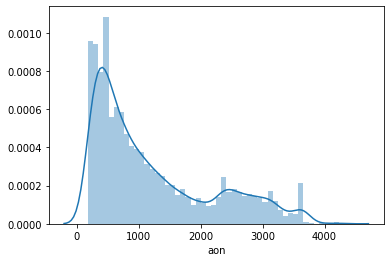

In [91]:
sns.distplot(telecom_data.aon)

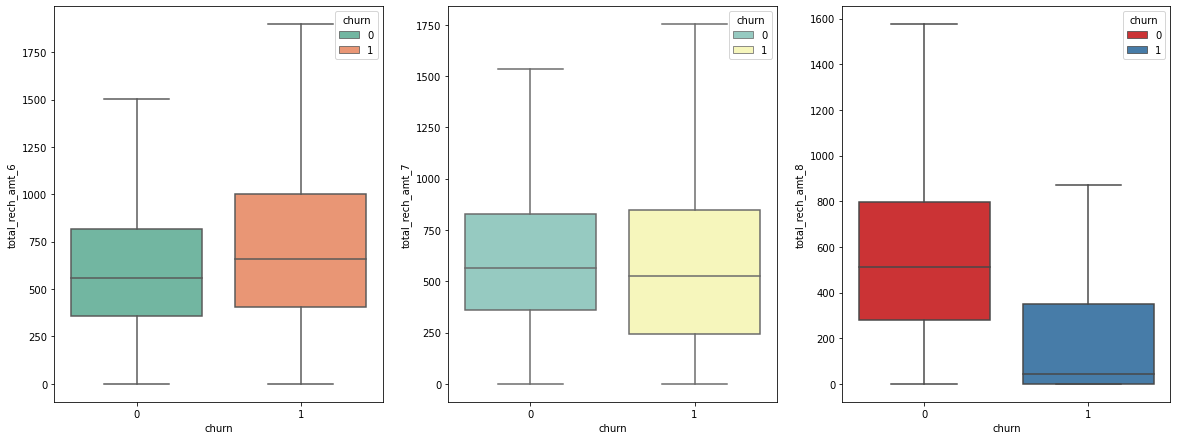

In [92]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

Analysis:We can see a drop in the total recharge amount for churned customers in the 8th Month(August).

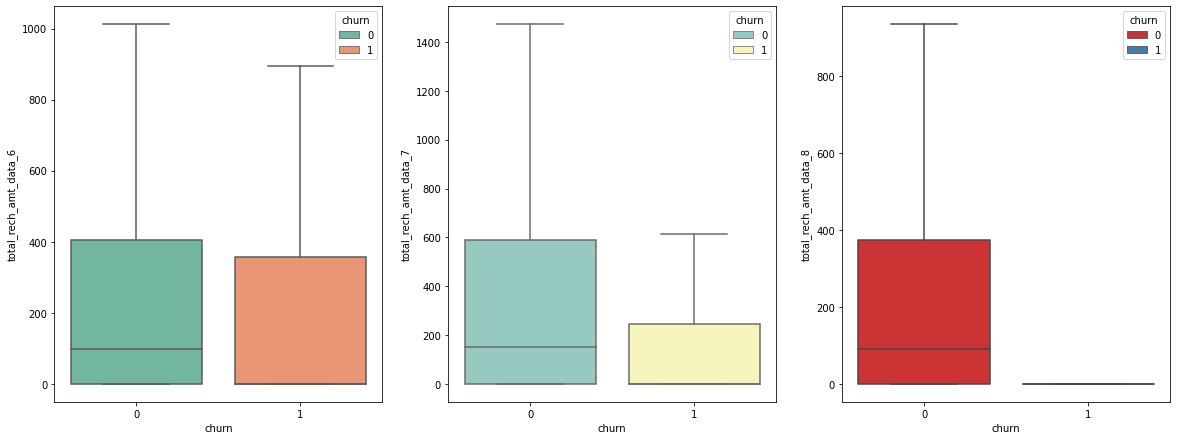

In [93]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

Analysis:We can see a drop in the total recharge amount for churned customers in the 8th Month(August).

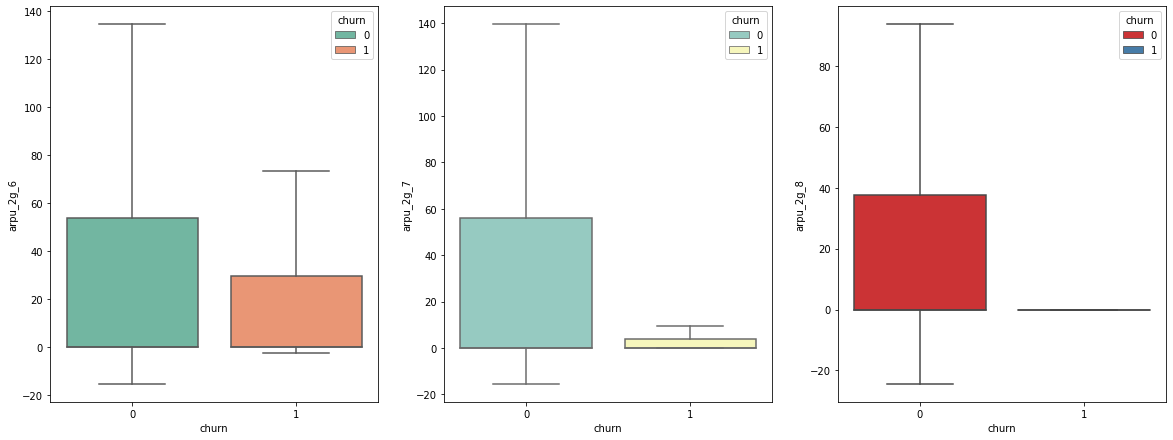

In [94]:
# Ploting for total revenue generated for 2g for data:
plot_box_chart('arpu_2g')

Analysis:We can see a drop in the total revenue generated for 2g data for churned customers in the 8th Month(August).

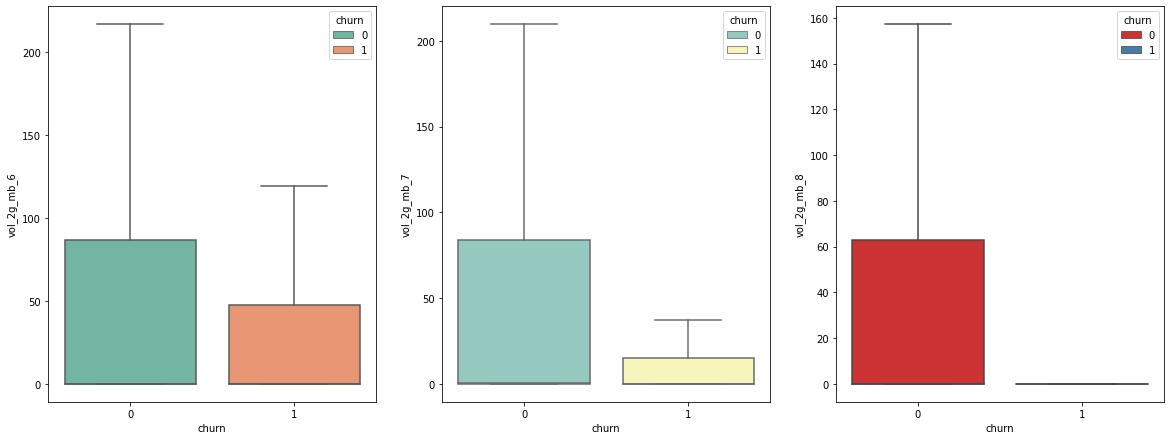

In [95]:
# Ploting for data volume use for 2g:
plot_box_chart('vol_2g_mb')

Analysis:We can see a drop in the data usage of 2g data for churned customers in the 8th Month(August).

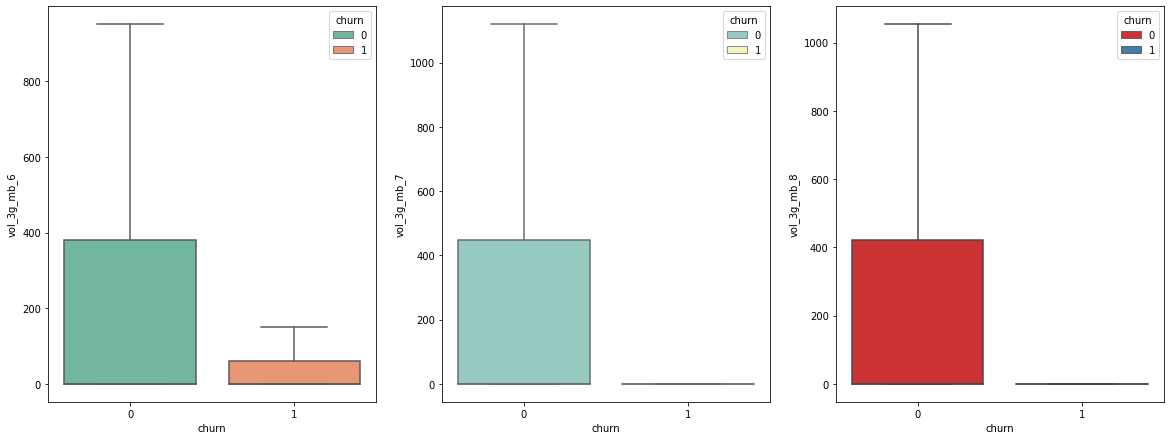

In [96]:
# Ploting for data volume used 3g :
plot_box_chart('vol_3g_mb')

Analysis:We can see a drop in the data usage of 3g data for churned customers in the 8th Month(August).

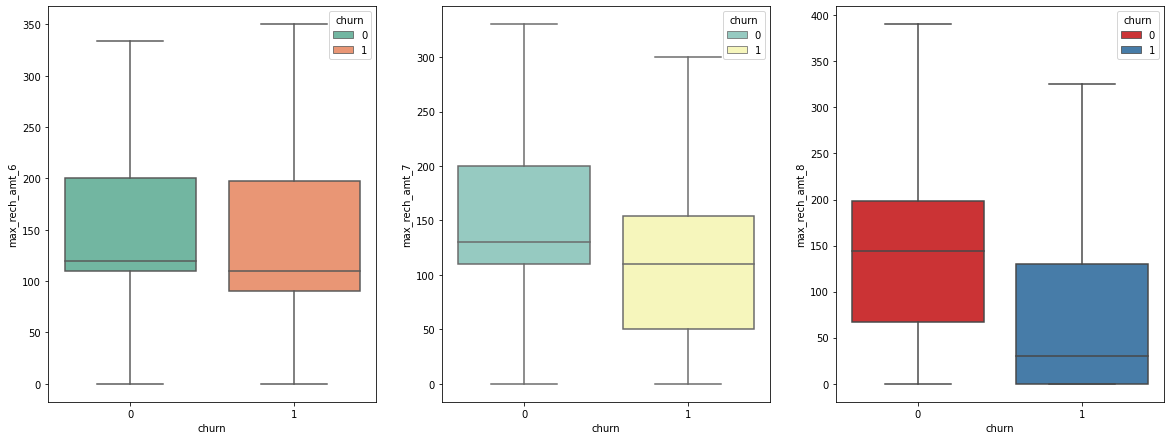

In [97]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

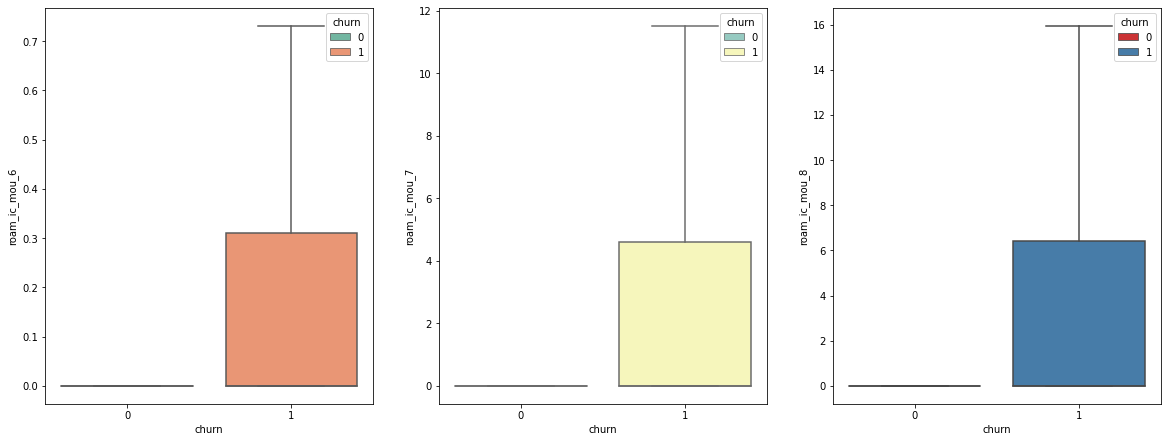

In [98]:
# Ploting for total recharge amount for data:
plot_box_chart('roam_ic_mou')

Analysis:We can see a increase in the usage of incoming call of customer in roaming zone during the call for churned customers in the 8th Month(August).

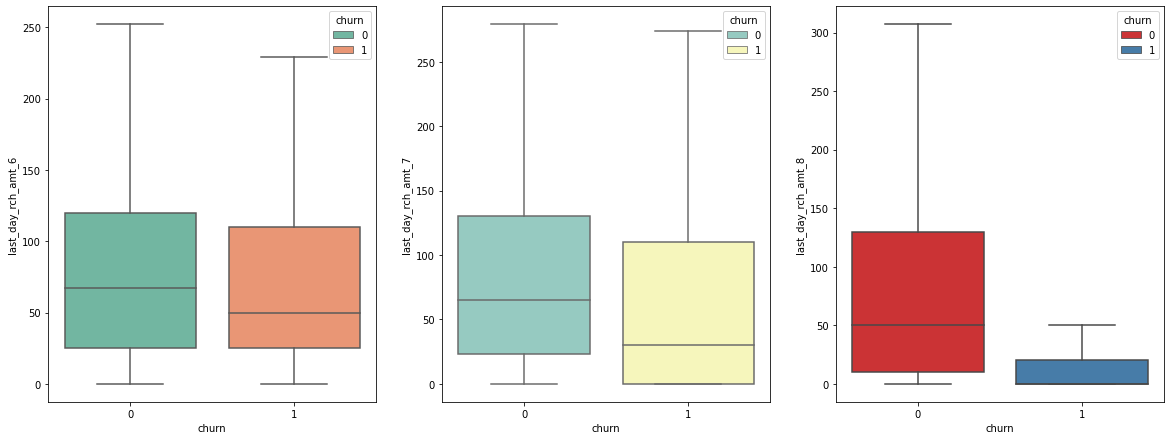

In [99]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

Analysis:We can see a drop in the recharge amount for churned customers in the 8th Month(August).

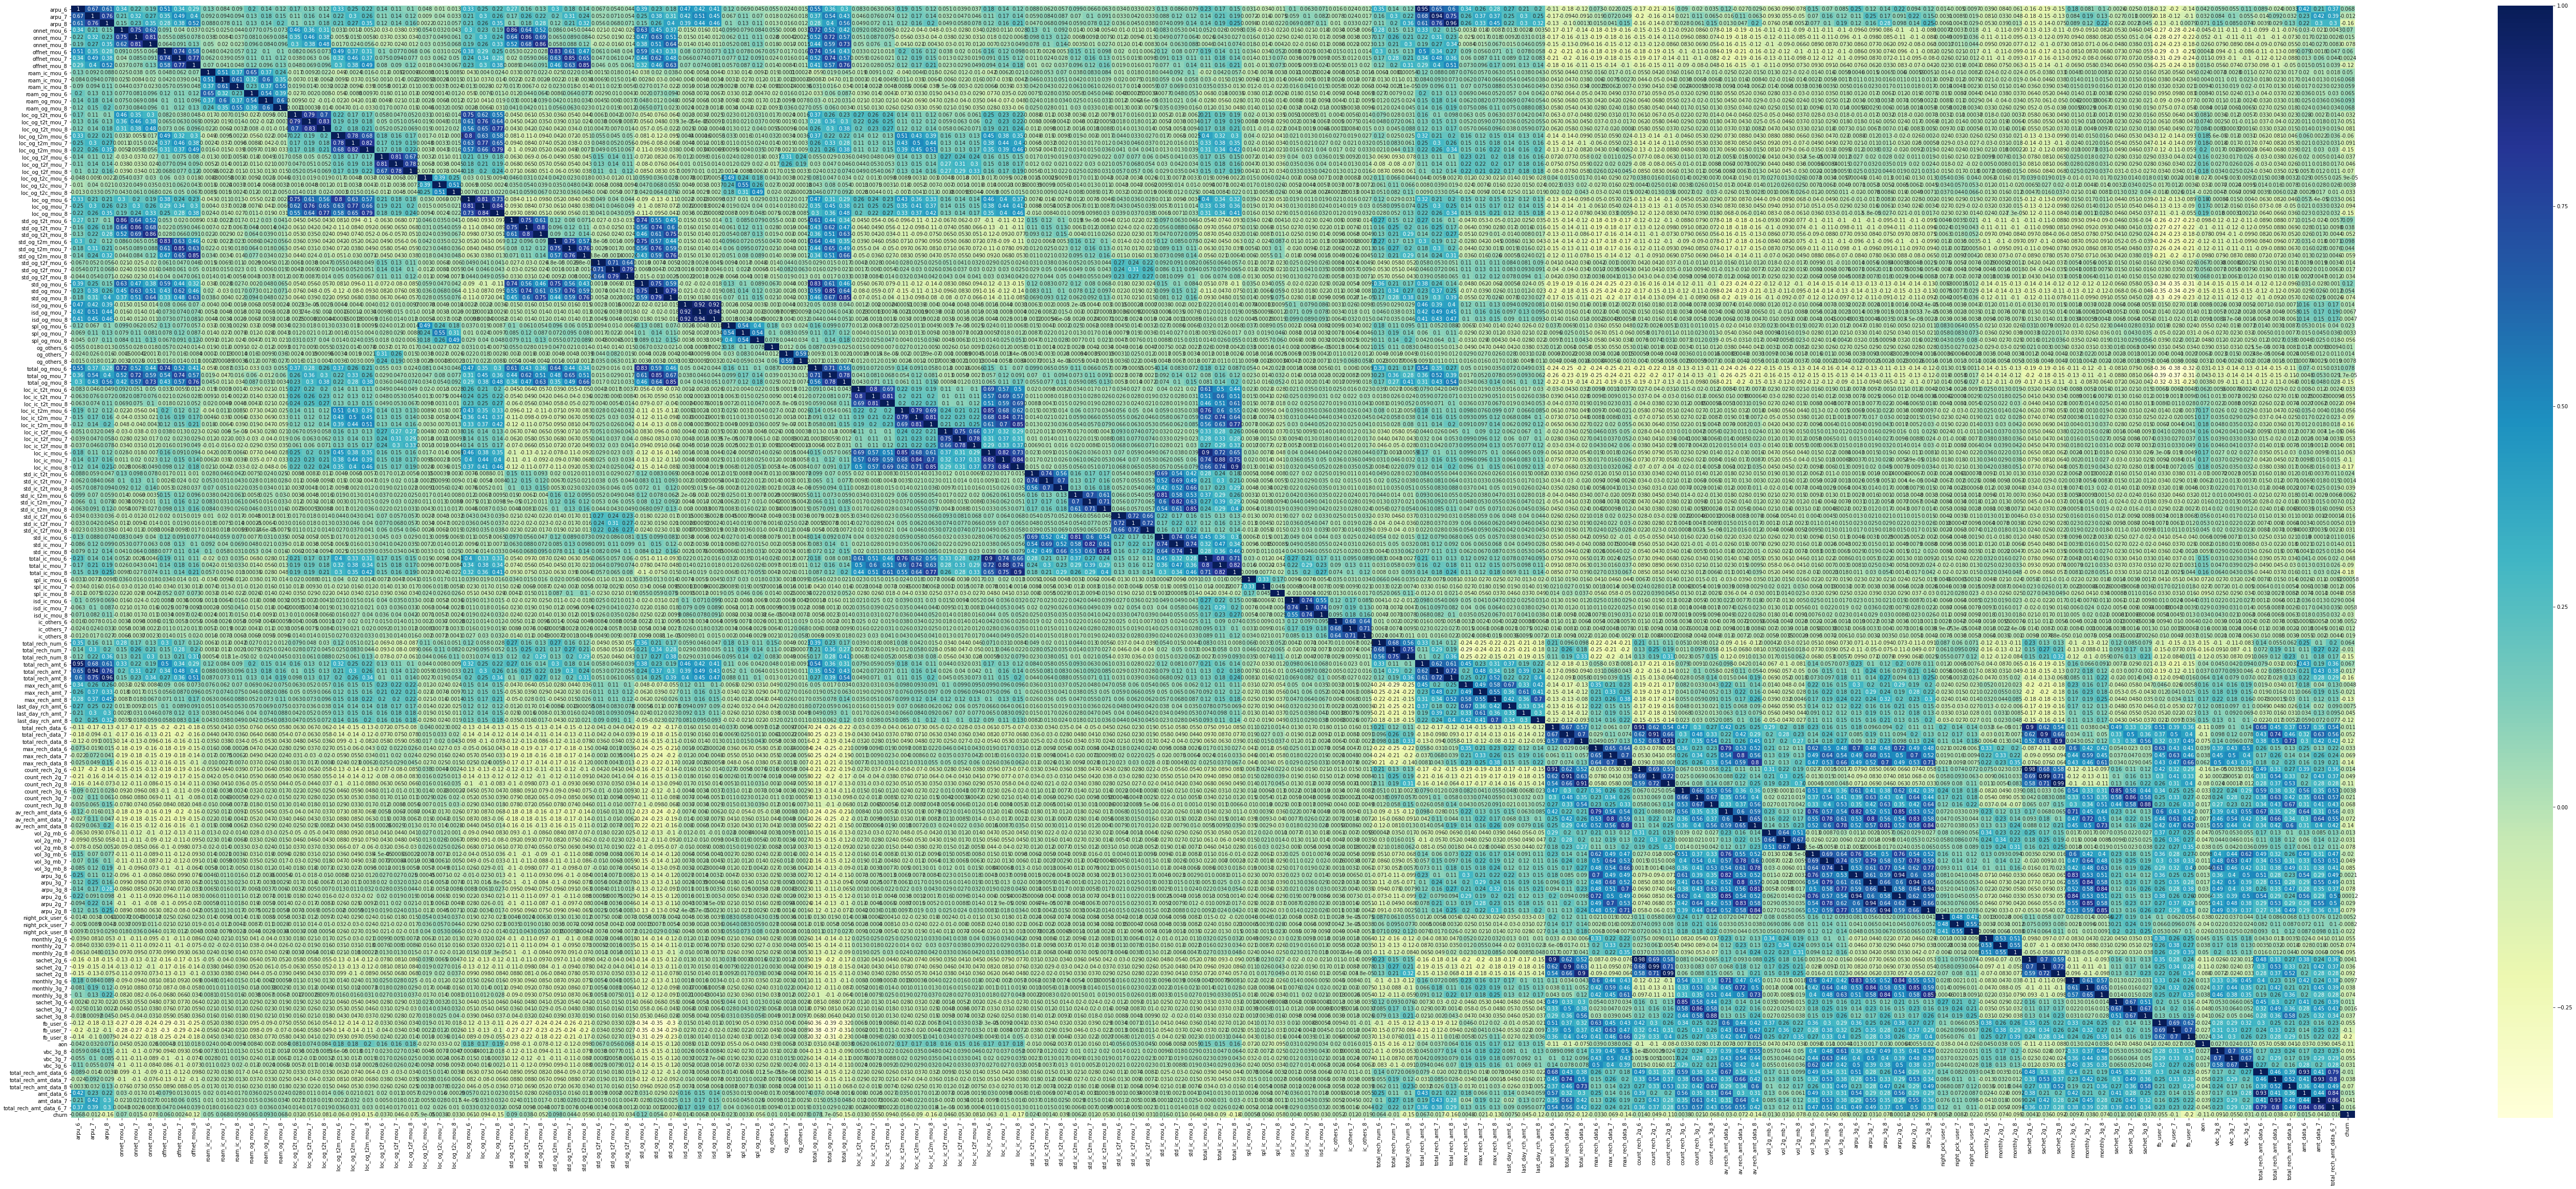

In [100]:
# generating the heatmap for the correlation
plt.figure(figsize=(100,40))
sns.heatmap(telecom_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Spliting the data to test and train

In [37]:
telecom_data_pca = telecom_data.copy()

X = telecom_data_pca.drop(['churn'], axis=1)
Y = telecom_data_pca['churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42, test_size=0.3, train_size=0.7)

In [38]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling class imbalance using SMOTE (Synthetic Minority Oversampling Technique)

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)


In [40]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

After OverSampling, the shape of train_X: (38528, 157)
After OverSampling, the shape of train_y: (38528,) 

After OverSampling, counts of label '1': 19264
After OverSampling, counts of label '0': 19264
After OverSampling, churn event rate : 50.0% 



### Performing PCA on the dataset

In [41]:
# performing PCA on the dataset
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

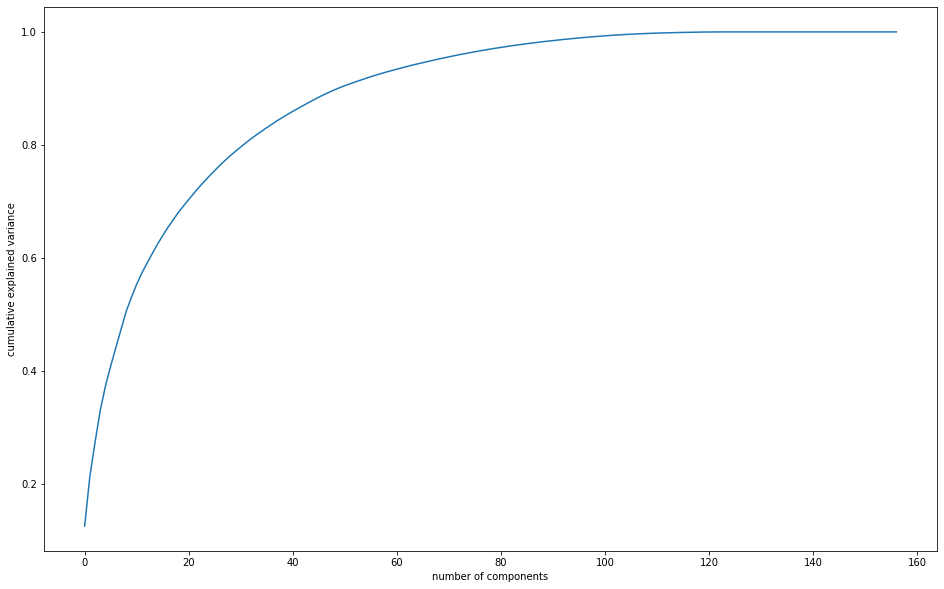

In [42]:
# creating the scree plot 
plt.figure(figsize = (16,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

so the features to considered are between 20-40 that will describe the variance by 90%

Performing <b>incremental PCA</b> to include only 35 components

In [43]:
inc_pca = IncrementalPCA(n_components=35)
X_train_pca = inc_pca.fit_transform(X_train)
X_train_pca.shape

(38528, 35)

In [44]:
X_test_pca = inc_pca.transform(X_test)
X_test_pca.shape

(8986, 35)

we will be performing the modelling on the PCA data and will consider the below models <br>
1) Logistic Regression <br>
2) SVM Regression Modelling <br>
3) Decision Tree <br>
4) Random Forest <br>
5) AdaBoost <br>
6) XGBoost <br>
7) Gradient Boosting <br>

1) Creating <b>LogisticRegression</b> Model

In [109]:
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# making the predictions on the train data
y_train_pred = log_reg.predict(X_train_pca)

# getting the metrics for train data predictions
get_model_metrics(y_train, y_train_pred, train_data=True)

Accuracy score for train data is 0.8318365863787376
Precision score for train data is 0.8250368637819698
Recall score for train data is 0.842296511627907
Classification report for train data is
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     19264
           1       0.83      0.84      0.83     19264

    accuracy                           0.83     38528
   macro avg       0.83      0.83      0.83     38528
weighted avg       0.83      0.83      0.83     38528



In [111]:
# making the predictions on the test data
y_test_pred = log_reg.predict(X_test_pca)

# getting the metrics for the test data predictions
get_model_metrics(y_test, y_test_pred, train_data=False)

Accuracy score for test data is 0.8129312263521032
Precision score for test data is 0.27728337236533956
Recall score for test data is 0.810958904109589
Classification report for test data is
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8256
           1       0.28      0.81      0.41       730

    accuracy                           0.81      8986
   macro avg       0.63      0.81      0.65      8986
weighted avg       0.92      0.81      0.85      8986



2) Creating<b> SVM Regression Modelling </b>Model

In [112]:
# spliting the data to test and train
telecom_data_SVM = telecom_data.copy()

X_svm = telecom_data_SVM.drop(['churn'], axis=1)
Y_svm = telecom_data_SVM['churn']

from sklearn.preprocessing import scale
X_svm = scale(X_svm)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, Y_svm, random_state=60, test_size=0.3, train_size=0.7)


print(y_train_svm.mean())
print(y_test_svm.mean())

0.08193828397004817
0.07956821722679724


In [113]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_svm, y_train_svm = sm.fit_sample(X_train_svm, y_train_svm)

In [114]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(X_train_svm, y_train_svm)

# predict for test data
y_pred = model.predict(X_test_svm)

In [115]:
from sklearn import metrics
metrics.confusion_matrix(y_true = y_test_svm, y_pred=y_pred)

array([[7283,  988],
       [ 179,  536]], dtype=int64)

In [116]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test_svm, y_pred))

# precision
print("precision", metrics.precision_score(y_test_svm, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_svm, y_pred))


accuracy 0.8701313153794792
precision 0.35170603674540685
recall 0.7496503496503496


In [117]:
# making the predictions on the train data
y_train_pred = model.predict(X_train_svm)

# getting the metrics for train data predictions
get_model_metrics(y_train_svm, y_train_pred, train_data=True)

Accuracy score for train data is 0.9145410151176685
Precision score for train data is 0.9000752068187515
Recall score for train data is 0.9326198763572133
Classification report for train data is
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     19249
           1       0.90      0.93      0.92     19249

    accuracy                           0.91     38498
   macro avg       0.92      0.91      0.91     38498
weighted avg       0.92      0.91      0.91     38498



In [118]:
# specificity (% of correctly classified)
print("specificity", 7283/(7283+988))

specificity 0.880546487728207


### Hyperparameter Tuning
#### K-Fold Cross Validation

In [119]:
# creating a KFold object with 5 splits 
folds_svm = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [120]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train_svm, y_train_svm, cv = folds_svm, scoring = 'accuracy') 

In [121]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.90766234 0.90038961 0.90402597 0.90167554 0.89725938]
mean accuracy = 0.9022025697383536


3) Creating <b>Decision Tree</b> Model

In [122]:
# creating the DecisionTreeClassifier with tuned hyperparameters

dtc = DecisionTreeClassifier()
kfolds = 5
params = {
    'max_depth': range(2,20, 4),
    'min_samples_split': range(100, 600, 100),
    'min_samples_leaf': range(100, 600, 100)
}

grid_cv = GridSearchCV(dtc, cv=kfolds, param_grid=params, return_train_score=True, scoring='accuracy')
grid_cv.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 4),
                         'min_samples_leaf': range(100, 600, 100),
              

In [123]:
# best params are 
print(grid_cv.best_params_)

{'max_depth': 14, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [124]:
# tuned DecisionTreeClassifier
tuned_dtc = DecisionTreeClassifier(max_depth= 14, min_samples_leaf= 100, min_samples_split= 100)
tuned_dtc.fit(X_train_pca, y_train)
y_train_pred = tuned_dtc.predict(X_train_pca)

# getting the metrics for the train dataset prediction
get_model_metrics(y_train, y_train_pred, train_data=True)

Accuracy score for train data is 0.8395712209302325
Precision score for train data is 0.8278125783011776
Recall score for train data is 0.8575062292358804
Classification report for train data is
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     19264
           1       0.83      0.86      0.84     19264

    accuracy                           0.84     38528
   macro avg       0.84      0.84      0.84     38528
weighted avg       0.84      0.84      0.84     38528



In [125]:
y_test_pred = tuned_dtc.predict(X_test_pca)

# getting the metrics for the test dataset predictions
get_model_metrics(y_test, y_test_pred, train_data=False)

Accuracy score for test data is 0.7975740040062319
Precision score for test data is 0.25102880658436216
Recall score for test data is 0.7520547945205479
Classification report for test data is
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8256
           1       0.25      0.75      0.38       730

    accuracy                           0.80      8986
   macro avg       0.61      0.78      0.63      8986
weighted avg       0.91      0.80      0.84      8986



In [126]:
# scores of GridSearch CV
scores = grid_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.328762      0.028831         0.002480        0.000615   
1       0.297312      0.007469         0.002473        0.000552   
2       0.296913      0.010818         0.002067        0.000190   
3       0.280921      0.005579         0.001998        0.000018   
4       0.280060      0.001314         0.002173        0.000233   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               2                    100                     100   
1               2                    100                     200   
2               2                    100                     300   
3               2                    100                     400   
4               2                    100                     500   

                                              params  split0_test_score  \
0  {'max_depth': 2, 'min_samples_leaf': 100, 'min...           0.688814   
1  {'max_depth': 2, 'min_samples_leaf': 100, 'min...           0.688814   
2  {'max_depth': 2, 'min_samples_leaf': 100, 'min...           0.688814   
3  {'max_depth': 2, 'min_samples_leaf': 100, 'min...           0.688814   
4  {'max_depth': 2, 'min_samples_leaf': 100, 'min...           0.688814   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.692577           0.676745           0.693226           0.686397   
1           0.692577           0.676745           0.693226           0.686397   
2           0.692577           0.676745           0.693226           0.686397   
3           0.692577           0.676745           0.693226           0.686397   
4           0.692577           0.676745           0.693226           0.686397   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.687552        0.005953              101            0.687626   
1         0.687552        0.005953              101            0.687626   
2         0.687552        0.005953              101            0.687626   
3         0.687552        0.005953              101            0.687626   
4         0.687552        0.005953              101            0.687626   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.693239            0.690286            0.682694   
1            0.693239            0.690286            0.682694   
2            0.693239            0.690286            0.682694   
3            0.693239            0.690286            0.682694   
4            0.693239            0.690286            0.682694   

   split4_train_score  mean_train_score  std_train_score  
0            0.687906           0.68835         0.003474  
1            0.687906           0.68835         0.003474  
2            0.687906           0.68835         0.003474  
3            0.687906           0.68835         0.003474  
4            0.687906           0.68835         0.003474

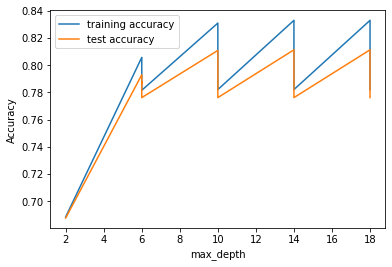

In [127]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


4) Creating <b>RandomForest</b> Model

In [45]:
rf = RandomForestClassifier()
folds = 2
params = {
    'max_depth': [4,8,10,12],
    'max_features': [12, 15, 20, 25, 30]
}

grid_cv = GridSearchCV(rf, cv=folds, param_grid=params, return_train_score=True, scoring='accuracy')
grid_cv.fit(X_train_pca, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [46]:
print('best params are %s ' % (grid_cv.best_params_))

best params are {'max_depth': 12, 'max_features': 15} 


In [47]:
# test data predictions
tuned_rf = RandomForestClassifier(max_depth=12, max_features=20, n_estimators=100)
tuned_rf.fit(X_train_pca, y_train)
y_train_pred = tuned_rf.predict(X_train_pca)

# getting the metrics for the train dataset predictions
get_model_metrics(y_train, y_train_pred, train_data=True)

Accuracy score for train data is 0.9650903239202658
Precision score for train data is 0.9452810496496198
Recall score for train data is 0.9873338870431894
Classification report for train data is
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     19264
           1       0.95      0.99      0.97     19264

    accuracy                           0.97     38528
   macro avg       0.97      0.97      0.97     38528
weighted avg       0.97      0.97      0.97     38528



In [48]:
y_test_pred = tuned_rf.predict(X_test_pca)

# getting the metrics for the train dataset predictions
get_model_metrics(y_test, y_test_pred, train_data=False)

Accuracy score for test data is 0.8791453371911863
Precision score for test data is 0.36494688922610014
Recall score for test data is 0.6589041095890411
Classification report for test data is
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8256
           1       0.36      0.66      0.47       730

    accuracy                           0.88      8986
   macro avg       0.67      0.78      0.70      8986
weighted avg       0.92      0.88      0.89      8986



In [49]:
scores = grid_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.416077      0.022817         0.031509        0.006207   
1       1.570085      0.085560         0.027369        0.005863   
2       2.265097      0.000361         0.034604        0.000380   
3       3.192714      0.474679         0.033440        0.004176   
4       3.137468      0.312282         0.032701        0.000955   

  param_max_depth param_max_features                                params  \
0               4                 12  {'max_depth': 4, 'max_features': 12}   
1               4                 15  {'max_depth': 4, 'max_features': 15}   
2               4                 20  {'max_depth': 4, 'max_features': 20}   
3               4                 25  {'max_depth': 4, 'max_features': 25}   
4               4                 30  {'max_depth': 4, 'max_features': 30}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.796719           0.802326         0.799522        0.002803   
1           0.793916           0.796927         0.795422        0.001505   
2           0.790075           0.795577         0.792826        0.002751   
3           0.798121           0.802741         0.800431        0.002310   
4           0.782444           0.787843         0.785143        0.002699   

   rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
0               17            0.805077            0.804713          0.804895   
1               18            0.803052            0.800301          0.801677   
2               19            0.801080            0.798432          0.799756   
3               16            0.808970            0.806115          0.807543   
4               20            0.793708            0.792463          0.793086   

   std_train_score  
0         0.000182  
1         0.001376  
2         0.001324  
3         0.001428  
4         0.000623

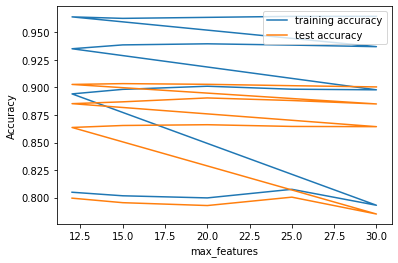

In [50]:
# plotting accuracies 
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

5) Creating <b>Adaboost Classifier</b> Model

In [134]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=100)


In [135]:
# fit the shallow decision tree 
shallow_tree.fit(X_train_svm, y_train_svm)

# test error
y_pred_adaboost = shallow_tree.predict(X_test_svm)
score_adaboost = metrics.accuracy_score(y_test_svm, y_pred_adaboost)
score_adaboost

0.8107055419541509

In [136]:
# making the predictions on the train data
y_train_pred_ada = shallow_tree.predict(X_train_svm)

# getting the metrics for train data predictions
get_model_metrics(y_train_svm, y_train_pred_ada, train_data=True)

Accuracy score for train data is 0.8331861395397163
Precision score for train data is 0.8223026282727776
Recall score for train data is 0.8500701335134293
Classification report for train data is
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     19249
           1       0.82      0.85      0.84     19249

    accuracy                           0.83     38498
   macro avg       0.83      0.83      0.83     38498
weighted avg       0.83      0.83      0.83     38498



Now, we will see the accuracy using the AdaBoost algorithm. In this following code, we will write code to calculate the accuracy of the AdaBoost models as we increase the number of trees from 1 to 50 with a step of 3 in the lines:

'estimators = list(range(1, 50, 3))'

'for n_est in estimators:'

We finally end up with the accuracy of all the models in a single list abc_scores.

In [137]:
# adaboost with the tree as base estimator

estimators = list(range(1,50,3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator = shallow_tree,
    n_estimators = n_est)
    
    ABC.fit(X_train_svm, y_train_svm)
    y_pred_adaboost = ABC.predict(X_test_svm)
    score_adaboost = metrics.accuracy_score(y_test_svm, y_pred_adaboost)
    abc_scores.append(score_adaboost)
    

In [138]:
abc_scores

[0.8107055419541509,
 0.8759180948141554,
 0.8832628533273982,
 0.881259737369241,
 0.8877142221233029,
 0.8902737591809481,
 0.8919430224794124,
 0.8917204540396172,
 0.8977298019140886,
 0.90140218117071,
 0.9025150233696861,
 0.9034052971288671,
 0.9055196973069218,
 0.907522813265079,
 0.9086356554640552,
 0.9079679501446695,
 0.9108613398620076]

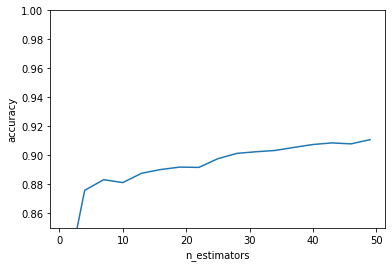

In [140]:
# plot test scores and n_estimators
plt.plot(estimators,abc_scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.ylim([0.85,1])
plt.show()

6) Creating <b>XGBoost Classifier</b> Model

In [141]:
# fit model
model_xg = XGBClassifier()
model_xg.fit(X_train_svm, y_train_svm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [143]:
# make predictions for test data
y_pred_xg = model_xg.predict(X_test_svm)
predictions = [round(value) for value in y_pred_xg]

In [144]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_svm, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.73%


In [145]:
# making the predictions on the train data
y_train_pred_ada = model_xg.predict(X_train_svm)

# getting the metrics for train data predictions
get_model_metrics(y_train_svm, y_train_pred_ada, train_data=True)

Accuracy score for train data is 0.8934490103381993
Precision score for train data is 0.9002272366960842
Recall score for train data is 0.8849810379759988
Classification report for train data is
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     19249
           1       0.90      0.88      0.89     19249

    accuracy                           0.89     38498
   macro avg       0.89      0.89      0.89     38498
weighted avg       0.89      0.89      0.89     38498



In [146]:
import xgboost as xgb
# transform it into a specific format that XGBoost can handle
D_train = xgb.DMatrix(X_train_svm, label=y_train_svm)
D_test = xgb.DMatrix(X_test_svm, label=y_test_svm)

In [147]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [148]:
model = xgb.train(param, D_train, steps)

In [149]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test_svm, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test_svm, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_svm, best_preds)))

Precision = 0.6714223522142417
Recall = 0.8239311166405834
Accuracy = 0.8758068105942577


In [ ]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train_svm, y_train_svm)

In [ ]:
best_parameters, score, _ = max(grid.grid_scores_, key=lambda x: x[1])
print('score: ', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

7) Creating <b>GradientBoostingClassifier</b> Model

In [ ]:
gbc = GradientBoostingClassifier()
folds = 2
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'max_depth': [2,4,8,16],
}

grid_cv = GridSearchCV(gbc, param_grid=params, cv=folds)
grid_cv.fit(X_train_pca, y_train)

In [ ]:
print('best params for Gradient Boosting Classifier is %s ' %(grid_cv.best_params_))

In [ ]:
# creating the GradientBoostingClassifier with tuned parameters
tuned_gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, n_estimators=100)
tuned_gbc.fit(X_train_pca, y_train)
y_train_pred = tuned_gbc.predict(X_train_pca)

# getting the metrics for the train dataset predictions
get_model_metrics(y_train, y_train_pred, train_data=True)

In [ ]:
y_test_pred = tuned_gbc.predict(X_test_pca)

# getting the metrics for the test dataset predictions
get_model_metrics(y_test, y_test_pred, train_data=False)

<h2>Finding the important features using the tuned Random Forest Classifier</h2>

In [51]:
# finding the important features by running the tuned Random Forest on the original dataset 
tuned_rf = RandomForestClassifier(max_depth=12, max_features=20, n_estimators=100)
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
important = tuned_rf.feature_importances_

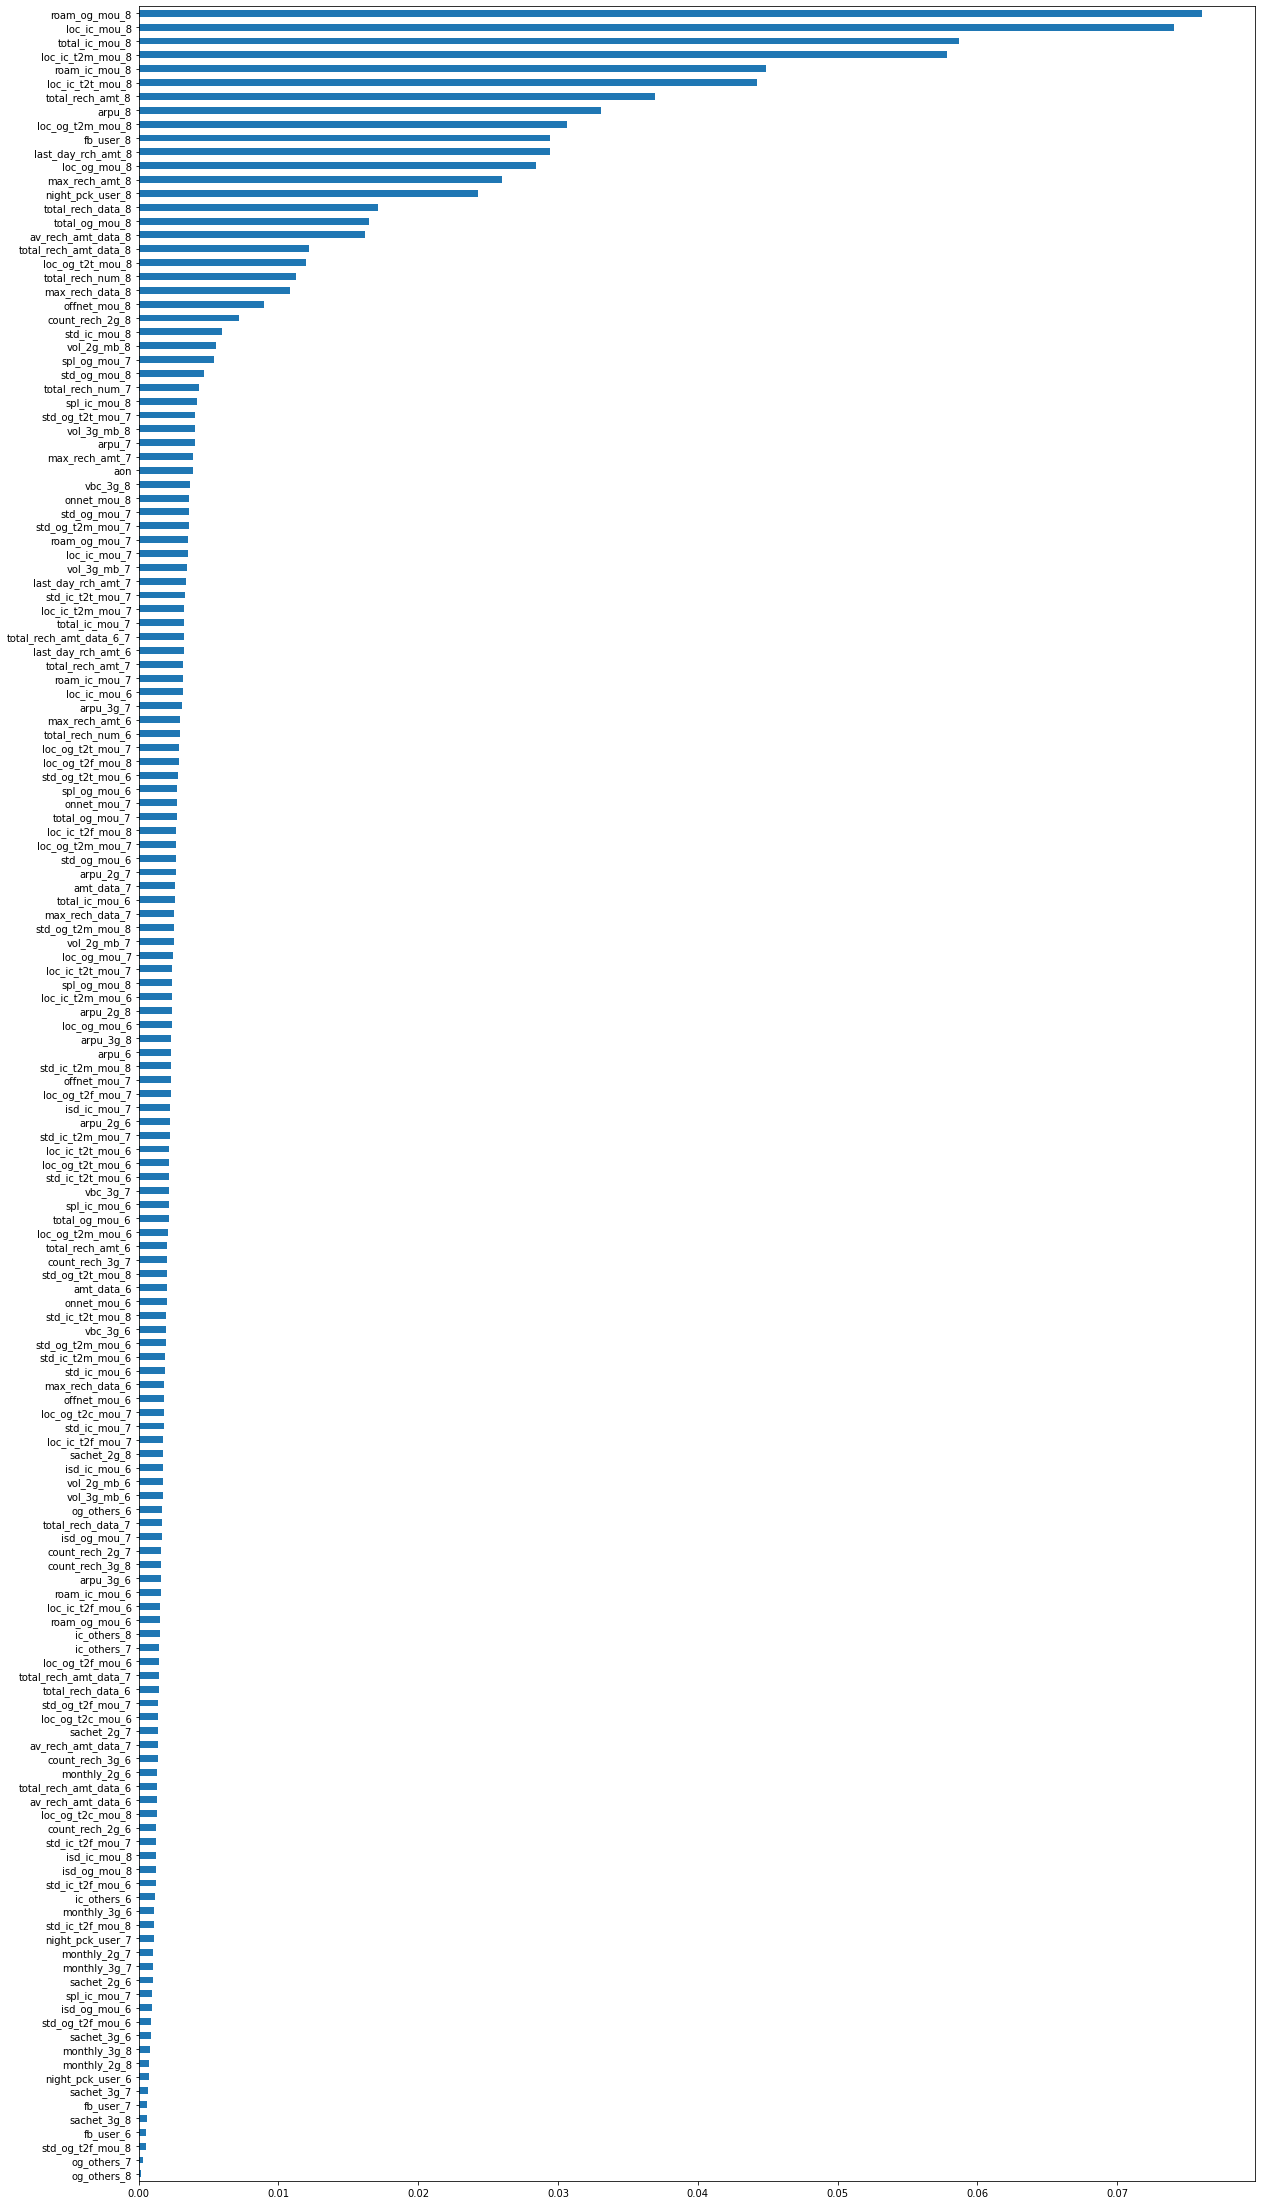

In [53]:
plt.figure(figsize=(20,40))
feat_importances = pd.Series(tuned_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

<b>By looks of the plot of the features importance it is quite visible features related to month 8 i.e. features related <br>
to action phase are important in determining whether the person will churn or not. <br>
So the company should focus on the data related to action phase to predict the probability if the customer will churn out <br>

In [54]:
# create dataframe
features = telecom_data.drop('churn', axis=1).columns
important_feature = pd.DataFrame({'variables' : features, 'importance_percentage': important*100})
important_feature = important_feature[['variables', 'importance_percentage']]

# sort features
important_feature = important_feature.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", important_feature.importance_percentage.sum())
important_feature

Sum of importance= 100.00000000000003


variables  importance_percentage
0              roam_og_mou_8               7.604834
1               loc_ic_mou_8               7.409580
2             total_ic_mou_8               5.866428
3           loc_ic_t2m_mou_8               5.785037
4              roam_ic_mou_8               4.490269
5           loc_ic_t2t_mou_8               4.421942
6           total_rech_amt_8               3.691284
7                     arpu_8               3.308533
8           loc_og_t2m_mou_8               3.061365
9                  fb_user_8               2.945254
10        last_day_rch_amt_8               2.940461
11              loc_og_mou_8               2.839779
12            max_rech_amt_8               2.596974
13          night_pck_user_8               2.425502
14         total_rech_data_8               1.715537
15            total_og_mou_8               1.648431
16        av_rech_amt_data_8               1.622576
17     total_rech_amt_data_8               1.220106
18          loc_og_t2t_mou_8               1.196952
19          total_rech_num_8               1.128267
20           max_rech_data_8               1.081764
21              offnet_mou_8               0.896889
22           count_rech_2g_8               0.719948
23              std_ic_mou_8               0.593384
24               vol_2g_mb_8               0.550975
25              spl_og_mou_7               0.536289
26              std_og_mou_8               0.464447
27          total_rech_num_7               0.430822
28              spl_ic_mou_8               0.415862
29          std_og_t2t_mou_7               0.404981
30               vol_3g_mb_8               0.401595
31                    arpu_7               0.400043
32            max_rech_amt_7               0.390518
33                       aon               0.387231
34                  vbc_3g_8               0.364699
35               onnet_mou_8               0.361190
36              std_og_mou_7               0.360083
37          std_og_t2m_mou_7               0.357981
38             roam_og_mou_7               0.354700
39              loc_ic_mou_7               0.353591
40               vol_3g_mb_7               0.343893
41        last_day_rch_amt_7               0.334877
42          std_ic_t2t_mou_7               0.328027
43          loc_ic_t2m_mou_7               0.324590
44            total_ic_mou_7               0.324535
45   total_rech_amt_data_6_7               0.322194
46        last_day_rch_amt_6               0.320886
47          total_rech_amt_7               0.320518
48             roam_ic_mou_7               0.316768
49              loc_ic_mou_6               0.313419
50                 arpu_3g_7               0.311014
51            max_rech_amt_6               0.297360
52          total_rech_num_6               0.297103
53          loc_og_t2t_mou_7               0.290076
54          loc_og_t2f_mou_8               0.288867
55          std_og_t2t_mou_6               0.284741
56              spl_og_mou_6               0.275921
57               onnet_mou_7               0.273956
58            total_og_mou_7               0.273050
59          loc_ic_t2f_mou_8               0.268557
60          loc_og_t2m_mou_7               0.267430
61              std_og_mou_6               0.266429
62                 arpu_2g_7               0.264219
63                amt_data_7               0.260812
64            total_ic_mou_6               0.257171
65           max_rech_data_7               0.253310
66          std_og_t2m_mou_8               0.252918
67               vol_2g_mb_7               0.250264
68              loc_og_mou_7               0.243116
69          loc_ic_t2t_mou_7               0.241827
70              spl_og_mou_8               0.240420
71          loc_ic_t2m_mou_6               0.239793
72                 arpu_2g_8               0.239541
73              loc_og_mou_6               0.239266
74                 arpu_3g_8               0.234127
75                    arpu_6               0.233673
76          std

In [55]:
# extract 30 top_features 
top_features = important_feature[0:30]
top_features

variables  importance_percentage
0           roam_og_mou_8               7.604834
1            loc_ic_mou_8               7.409580
2          total_ic_mou_8               5.866428
3        loc_ic_t2m_mou_8               5.785037
4           roam_ic_mou_8               4.490269
5        loc_ic_t2t_mou_8               4.421942
6        total_rech_amt_8               3.691284
7                  arpu_8               3.308533
8        loc_og_t2m_mou_8               3.061365
9               fb_user_8               2.945254
10     last_day_rch_amt_8               2.940461
11           loc_og_mou_8               2.839779
12         max_rech_amt_8               2.596974
13       night_pck_user_8               2.425502
14      total_rech_data_8               1.715537
15         total_og_mou_8               1.648431
16     av_rech_amt_data_8               1.622576
17  total_rech_amt_data_8               1.220106
18       loc_og_t2t_mou_8               1.196952
19       total_rech_num_8               1.128267
20        max_rech_data_8               1.081764
21           offnet_mou_8               0.896889
22        count_rech_2g_8               0.719948
23           std_ic_mou_8               0.593384
24            vol_2g_mb_8               0.550975
25           spl_og_mou_7               0.536289
26           std_og_mou_8               0.464447
27       total_rech_num_7               0.430822
28           spl_ic_mou_8               0.415862
29       std_og_t2t_mou_7               0.404981

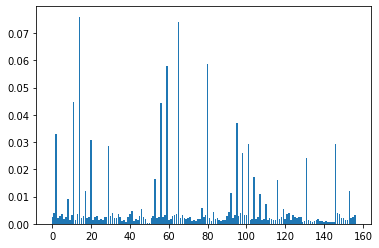

In [56]:
# plot
plt.bar(range(len(tuned_rf.feature_importances_)), tuned_rf.feature_importances_)
plt.show()

## Business Insights

<h3>Analysis results for different models</h3> <br>
<br>

<table>
    <thead>
        <td>Model</td>
        <td>Training Accuracy</td>
        <td>Test Accuracy</td>
    </thead>
    <tr>
        <td>Logistic Regression</td>
        <td>83</td>
        <td>81</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>96</td>
        <td>87</td>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>83</td>
        <td>79</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>91</td>
        <td>87</td>
    </tr>
    <tr>
        <td>Ada Boosting</td>
        <td>83</td>
        <td>81</td>
    </tr>
    <tr>
        <td>XG Boost</td>
        <td>89</td>
        <td>89</td>
    </tr>
    <tr>
        <td>Gradient Boosting</td>
        <td>94</td>
        <td>87</td>
    </tr>
</table>

1. Features related to month 8 are important in predicting whether the customer will churn out or not.
2. Incoming calls Minutes of usage - voice calls per user seems to be most important feature in determining churn prediction.
3. Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour.
4. Local Outgoing calls made to landline, mobile and call center provides a strong indicator of churn behaviour.
5. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
6. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
7. The company needs to focus on the Night Pack rates. Perhaps, the rates are too high. Provide them with some kind of good offers to increase the users.


### In models
1. Random forest produce best result on this dataset with 96% Accuracy.
2. Gradient Boosting also produce good accuracy with 94%.
3. XGBoost also produce apt accuracy of 91% (default overfit model) and 90% with tuned hyperparameters.

<b>As per our analysis SVM, Random forest and Gradient Boosting produce best accuracy and models can be selected to predict churn data for future dataset or production.</b>